In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
import matplotlib as mpl

from DoubleRigidWallOverdampedBrownExp_Python import RigidWallOverdampedLangevin3D as py_simu

import sys
sys.path.append(r"/home/e.millan/Documents/Stage2020-Nageurs-actifs-proche-de-parois-deformable/Cumulant4-cas-manips")
from DoubleRigidWallOverdampedBrownExp_Cython import RigidWallOverdampedLangevin3D as cy_simu

import time

from matplotlib import rc
import seaborn as sns
custom_params = {
    "xtick.direction": "in",
    "ytick.direction": "in",
    "lines.markeredgecolor": "k",
    "lines.markeredgewidth": 0.3,
    "figure.dpi": 200,
    "text.usetex": True,
    "font.family": "serif",
    'axes.titlesize':10,
    'axes.labelsize':10,
}
# sns.set_context("notebook", rc={"lines.linewidth": 3})


sns.set_theme(context = "paper", style="ticks", rc=custom_params)

In [2]:
# Param fixé comme expériences
a = 1.519e-6 #1.12e-6/2
H = 40e-6
lD = 88.0e-9 #Répultion mur
kBT=1.38e-23*300
lB = 526e-9 #gravité
B = 5.0
eta=0.001

zz = np.linspace(-H+H*1e-3, H-H*1e-3, 1000)

dt = 1e-2
Nt = 10000
Nt_sub = 1

Ns = [1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, 5000000, 10000000]

In [3]:
t_py = np.zeros(len(Ns))
t_cy = np.zeros(len(Ns))

for n, i in enumerate(Ns):
    t0 = time.time()
    python = py_simu(dt=dt, Nt=i, a=a, H=H, lD=lD, lB=lB, B=B, Nt_sub=Nt_sub)
    python.trajectory()
    t_py[n] = time.time() - t0
    
    t0 = time.time()
    cython = cy_simu(dt=dt, Nt=i, a=a, H=H, lD=lD, lB=lB, B=B, Nt_sub=Nt_sub)
    cython.trajectory()
    t_cy[n] = time.time() - t0
    


In [4]:
def linear(x, a, b):
    return a*x+b

In [5]:
popt_py, pcov_py = curve_fit(linear, Ns, t_py)

popt_cy, pcov_cy = curve_fit(linear, Ns, t_cy)

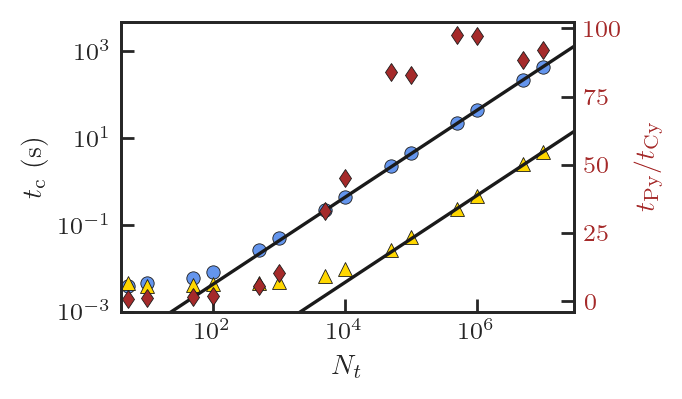

In [50]:
fig = plt.figure(figsize = (3.5, 3.5/1.68),  tight_layout=True)

ax1 = plt.subplot(111)

ax1.loglog(Ns, t_py, "o", color="cornflowerblue", label="Python")
ax1.plot(Ns, t_cy, "^", color="gold", label="Cython")
ax1.plot(np.linspace(1e1, 5e7, 100), [linear(n, popt_py[0],0) for n in np.linspace(1e1, 5e7, 100)], "k-")
ax1.plot(np.linspace(1e3, 5e7, 100), [linear(n, popt_cy[0],0) for n in np.linspace(1e3, 5e7, 100)], "k-")
ax1.set(
    xlabel = r"$N_t$",
    ylabel = r"$t_\mathrm{c}$ (s)",
)
ax1.set_xlim(4, 3e7)
ax1.set_ylim(1e-3, None)
ax11=ax1.twinx()
ax11.plot(Ns, t_py/t_cy, "d", color="brown",)
ax11.set_ylabel("$t_\mathrm{Py}/t_\mathrm{Cy}$",color="brown",fontweight="bold")
ax11.tick_params(axis='y', labelcolor="brown")


fig.tight_layout()
plt.savefig("../Figures/speed_test_Cython.pdf")

In [7]:
start = 10
finish = 1e6
# np.unique(np.logspace(np.log(start)/ np.log(10), np.log(finish)/np.log(10), num = 1000).astype(int))